#  Applied Data Science with Python - Assignment 2
  
##  Marketing Campaigns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #importing basic libraries for EDA 
import seaborn as sns
import seaborn.objects as so

In [2]:
df=pd.read_csv(r"C:\Users\GAYATHRI NARESH\Downloads\marketing_data.csv") #reading the data provided for marketing campaign

In [3]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.info()  #Info regarding the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [41]:
data_dic=pd.read_excel(r"C:\Users\GAYATHRI NARESH\Downloads\1688639964_datadictionaryresponsetomarketingcampaigns.xlsx")
      #Reading the excel containing description of various columns in the dataframe

In [42]:
pd.set_option('display.max_colwidth',None)
data_dic

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's household
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


In [3]:
df.columns=[i.strip() for i in df.columns]
df.columns                                   #Columns in the dataframe and its proper alignment

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# 1. Missing Value Computation

In [4]:
df.isna().sum() #Determing null values in the given data

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

There are 24 missing values in the income column

In [6]:
df['Education'].unique()   #Unique Values in Education Column

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [7]:
df['Marital_Status'].unique()  #Unique Values in Marital Status Column

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [5]:
df['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [6]:
def rep(x):
    return float(x.replace('$','').replace(',',''))

In [7]:
df['Income']=df['Income'].astype(str).apply(rep)   #Removing the dollar sign and comma in income for computational purposes
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [8]:
df[df['Income'].isna() ==True]   #Rows with no income value

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


# Outlier Treatment

<Axes: >

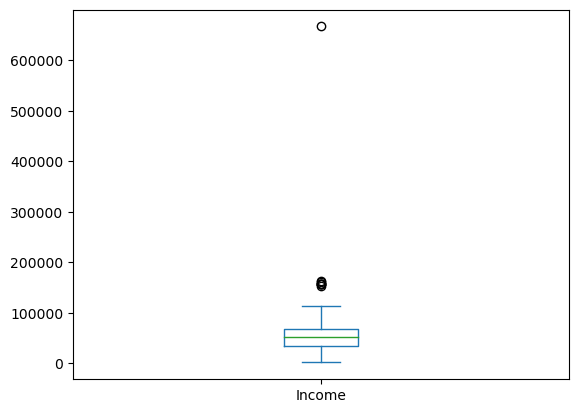

In [8]:
df['Income'].plot(kind='box')    #box plot for determing outliers in income 

Computation and dropping of outliers in income before filling up the missing values ---- which will give a more reasonable mean value of income

In [9]:
Q=df['Income'].quantile([0.25,0.50,0.75])
print(Q)
IQR=Q[0.75]-Q[0.25]
upper_outlier=Q[0.75]+1.5*IQR
lower_outlier=Q[0.25]-1.5*IQR
df[(df['Income'] > upper_outlier) | (df['Income'] < lower_outlier)].sort_values(['Income']) #Detecting Outliers in Income

0.25    35303.0
0.50    51381.5
0.75    68522.0
Name: Income, dtype: float64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2/7/14,81,1,...,0,0,0,0,0,0,0,0,0,SP
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,0,CA
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,...,0,1,0,0,0,0,0,0,0,SA
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/14,98,20,...,0,0,0,0,0,0,0,0,0,IND
853,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,...,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,...,1,0,0,0,0,0,0,0,0,US
731,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,...,1,1,0,0,0,0,0,0,0,SP
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [9]:
pd.options.display.max_columns=100

In [11]:
df_1=df.drop(df[(df['Income'] > upper_outlier) | (df['Income'] < lower_outlier)].index)  
df_1 #New Dataframe after removing the rows with Income Outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [13]:
df2=pd.DataFrame()    #Creating 2 new dataframes with and without income data
df1=pd.DataFrame()

In [14]:
arr1=df_1['Income'].isna().values
for i in range(len(arr1)):
    if arr1[i]== True:
        df1[i]=pd.DataFrame(df_1.iloc[i])
    else:
        df2[i]=pd.DataFrame(df_1.iloc[i])
df_noincome=df1.transpose()
df_income=df2.transpose()    #Separation of rows with Income and without(Nan) income values in datasheet

In [13]:
df_noincome

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
393,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
448,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
523,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA
587,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER
894,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US
992,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER
1091,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1180,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS


In [15]:
df_noincome.groupby(['Education','Marital_Status']).mean()['Income']

Education   Marital_Status
2n Cycle    Married          NaN
            Single           NaN
            Together         NaN
Graduation  Married          NaN
            Single           NaN
            Together         NaN
Master      Together         NaN
            Widow            NaN
PhD         Married          NaN
            Single           NaN
            Together         NaN
Name: Income, dtype: float64

In [16]:
df_income['Income']=df_income['Income'].astype(str).apply(rep) 

In [17]:
df_income.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US


In [18]:
df_incomemean=df_income.groupby(['Education','Marital_Status']).mean('Income').round(2)
df_incomemean['Income']   #Grouping by same education and Marital status - to get the mean income to fill up in missing values

Education   Marital_Status
2n Cycle    Divorced          49395.13
            Married           46201.10
            Single            53673.94
            Together          44736.41
            Widow             51392.20
Basic       Divorced           9548.00
            Married           21960.50
            Single            18238.67
            Together          21240.07
            Widow             22123.00
Graduation  Absurd            79244.00
            Alone             34176.00
            Divorced          53683.69
            Married           50800.26
            Single            51322.18
            Together          53241.54
            Widow             54976.66
Master      Absurd            65487.00
            Alone             61331.00
            Divorced          50331.95
            Married           53286.03
            Single            53530.56
            Together          51063.23
            Widow             58401.55
PhD         Alone             35860.0

In [19]:
df_noinc=df_noincome.groupby(['Education','Marital_Status']).mean('Income')
df_noinc['Income']=df_incomemean['Income'].copy()
#Filling Null Values in Income with mean calculated based on Education and Marital Status

In [20]:
df_noinc["Income"]

Education   Marital_Status
2n Cycle    Married           46201.10
            Single            53673.94
            Together          44736.41
Graduation  Married           50800.26
            Single            51322.18
            Together          53241.54
Master      Together          51063.23
            Widow             58401.55
PhD         Married           56530.78
            Single            53314.61
            Together          55116.59
Name: Income, dtype: float64

In [21]:
df_noincome=df_noincome.merge(df_noinc["Income"],on=['Education','Marital_Status'])
df_noincome   #Merging the new income calculated column with the existing dataframe without income values 

,ID,Year_Birth,Education,Marital_Status,Income_x,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_y
0,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,9,0,0,0,0,0,0,0,GER,56530.78
1,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,6,0,0,0,0,0,0,0,CA,56530.78
2,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,7,0,0,0,0,0,0,0,US,50800.26
3,2437,1989,Graduation,Married,NaN,0,0,6/3/13,69,861,...,3,0,1,0,1,0,0,0,SP,50800.26
4,5079,1971,Graduation,Married,NaN,1,1,3/3/13,82,71,...,8,0,0,0,0,0,0,0,AUS,50800.26
5,1295,1963,Graduation,Married,NaN,0,1,8/11/13,96,231,...,4,0,0,0,0,0,0,0,CA,50800.26
6,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,7,0,0,0,0,0,0,0,AUS,55116.59
7,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,1,0,0,0,0,0,0,0,AUS,51322.18
8,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,7,0,0,0,0,0,0,0,GER,51322.18
9,8557,1982,Graduation,Single,NaN,1,0,6/17/13,57,11,...,6,0,0,0,0,0,0,0,AUS,51322.18


In [22]:
df_noincomeupdated=df_noincome.drop(['Income_x'],axis=1)

In [23]:
df_noincomeupdated['Income']=df_noincomeupdated['Income_y']
df_noincomeupdated=df_noincomeupdated.drop(['Income_y'],axis=1)

In [24]:
df_noincomeupdated.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income'],
      dtype='object')

In [25]:
df_income.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [26]:
df_new=pd.concat([df_noincomeupdated,df_income],axis=0)
df_new.head(3)  #Merging the 2 dataframes with all income values filled with mean value

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,8996,1957,PhD,Married,2,1,11/19/12,4,230,42,...,9,0,0,0,0,0,0,0,GER,56530.78
1,8268,1961,PhD,Married,0,1,7/11/13,23,352,0,...,6,0,0,0,0,0,0,0,CA,56530.78
2,1994,1983,Graduation,Married,1,0,11/15/13,11,5,5,...,7,0,0,0,0,0,0,0,US,50800.26


In [27]:
df_new.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Income                 0
dtype: int64

No missing datas in any columns

<Axes: >

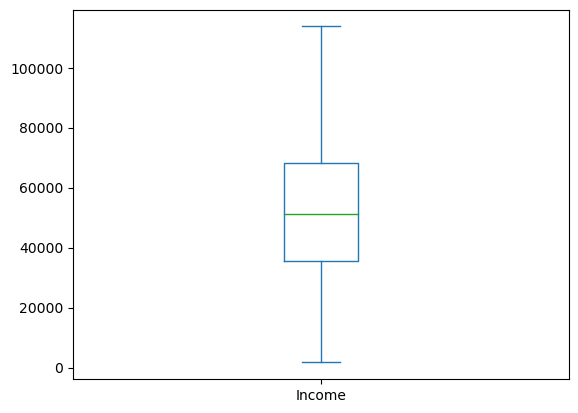

In [29]:
df_new['Income'].plot(kind='box')    #Box plot for new income column

In [31]:
df_new['Dt_Customer']=pd.to_datetime(df_new['Dt_Customer']) #Coverting the date to datetime format

In [30]:
df_new.head(3)

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,8996,1957,PhD,Married,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,56530.78
1,8268,1961,PhD,Married,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,56530.78
2,1994,1983,Graduation,Married,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,50800.26


# 2. Creating variables to populate the total

In [32]:
df_new['total_children']=df_new['Kidhome']+df_new['Teenhome']    #Total children at home

In [33]:
#Total Amount spent on various items
df_new['Total Amount Spent']=df_new['MntWines']+df_new['MntFruits']+df_new['MntSweetProducts']+df_new['MntGoldProds']+df_new['MntMeatProducts']+df_new['MntFishProducts']

In [55]:
#Total no of purchases through various channels
df_new['Total no of Purchases']=df_new['NumDealsPurchases']+df_new['NumWebPurchases']+df_new['NumCatalogPurchases']+df_new['NumStorePurchases']

In [34]:
df_new.head(3)

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_children,Total Amount Spent,Total no of Purchases
0,8996,1957,PhD,Married,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,56530.78,3,603,29
1,8268,1961,PhD,Married,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,56530.78,1,404,17
2,1994,1983,Graduation,Married,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,50800.26,1,19,4


# Encoding of categorical variables

In [45]:
#Label Encoding for Education              
from sklearn import preprocessing
enc= preprocessing.LabelEncoder()
enc.fit(df_new['Education'])
df_new['Education_num'] = enc.transform(df_new['Education'])+1
df_new.pivot_table(columns='Education',values='Education_num')

Education,2n Cycle,Basic,Graduation,Master,PhD
Education_num,1,2,3,4,5


In [46]:
#Ordinal Encoding  for Education
from sklearn import preprocessing
enc= preprocessing.OrdinalEncoder()
enc.fit(df_new[['Education']])
df_new['Education_num'] = enc.transform(df_new[['Education']])
df_new.pivot_table(columns='Education',values='Education_num')

Education,2n Cycle,Basic,Graduation,Master,PhD
Education_num,0.0,1.0,2.0,3.0,4.0


In [47]:
#OnehotEncoding for Marital status
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(max_categories=8)
enc.fit(df_new[['Marital_Status']])
arr=enc.transform(df_new[['Marital_Status']]).toarray()
arr

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# 3. Data Visualisation

# 3.1 Amount Spent on various items

Text(0.5, 1.0, 'Income spent on various items')

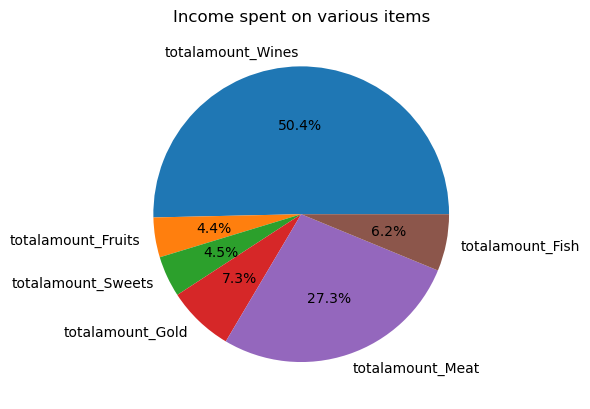

In [35]:
labels='totalamount_Wines','totalamount_Fruits','totalamount_Sweets','totalamount_Gold','totalamount_Meat','totalamount_Fish'
x=[df_new['MntWines'].sum(),df_new['MntFruits'].sum(),df_new['MntSweetProducts'].sum(),df_new['MntGoldProds'].sum(),df_new['MntMeatProducts'].sum(),df_new['MntFishProducts'].sum()]
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.title('Income spent on various items')

Performance: Wines performed best in terms of revenue followed by Meat,gold etc
Product that yielded least revenue was fruits

# 3.2 Relation between 2 variables

Text(0, 0.5, 'Number of Web Purchases')

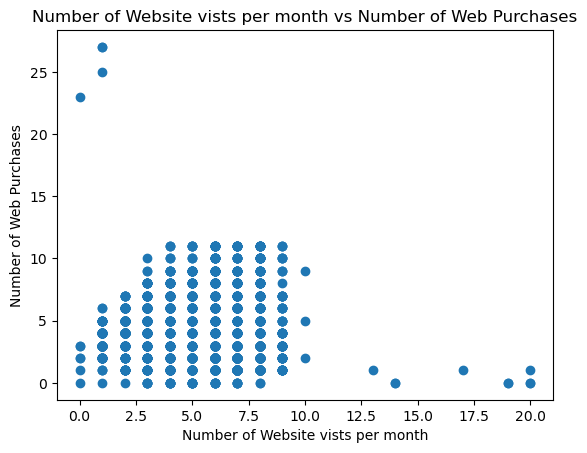

In [35]:
plt.scatter(df_new['NumWebVisitsMonth'], df_new['NumWebPurchases'])
plt.title('Number of Website vists per month vs Number of Web Purchases')
plt.xlabel('Number of Website vists per month')
plt.ylabel('Number of Web Purchases')

People who visited the website aorund 3 to 8 times did many web purchases compared to others who visited many time and least times

In [36]:
df_new.groupby(['NumWebVisitsMonth']).count()['NumWebPurchases']  #Count of no of visits and purchases

NumWebVisitsMonth
0       7
1     150
2     202
3     205
4     218
5     281
6     339
7     393
8     342
9      83
10      3
13      1
14      2
17      1
19      2
20      3
Name: NumWebPurchases, dtype: int64

<Axes: ylabel='NumWebVisitsMonth'>

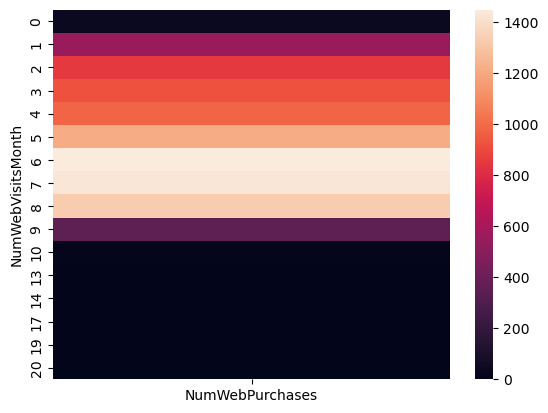

In [39]:
ax=df_new.pivot_table(index='NumWebVisitsMonth',values='NumWebPurchases',aggfunc='sum')
sns.heatmap(ax)             #Heatmap showing correlation between Number of web visits vs Purchases

# 3.3 Relation between Total children and No of Purchases done

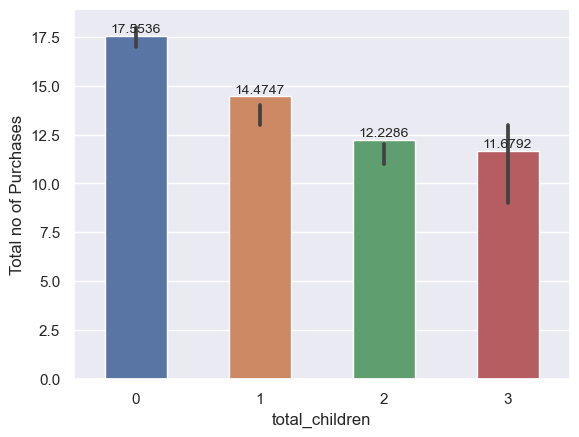

In [30]:
sns.set_theme()
ax=sns.barplot(x=df_new['total_children'],y=df_new['Total no of Purchases'],width=0.5)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

People with more children made less no of purchases and with no children made the highest no of purchases

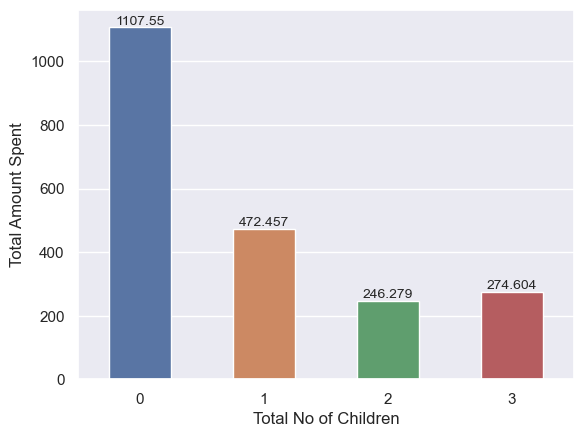

In [31]:
sns.set_theme()
ax=sns.barplot(x=df_new['total_children'],y=df_new['Total Amount Spent'],width=0.5,errorbar=None)
plt.ylabel('Total Amount Spent')
plt.xlabel('Total No of Children')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

In [35]:
df_new['Total Amount Spent'].astype(float)

0        603.0
1        404.0
2         19.0
3       1611.0
4         97.0
         ...  
2227     689.0
2228      55.0
2229     309.0
2230    1383.0
2231    1078.0
Name: Total Amount Spent, Length: 2232, dtype: float64

In [49]:
df_new.groupby(['Country']).mean().round(2).sort_values(['Income'])  #Countries with mean income

,Income
Country,
IND,48251.06
SP,51271.20
AUS,51878.18
US,52179.87
CA,52666.18
SA,52699.02
GER,52895.37
ME,57680.33


Country with highest mean income - Mexico ,followed by Germany

# 3.4 Country wise Total amount spent on various items

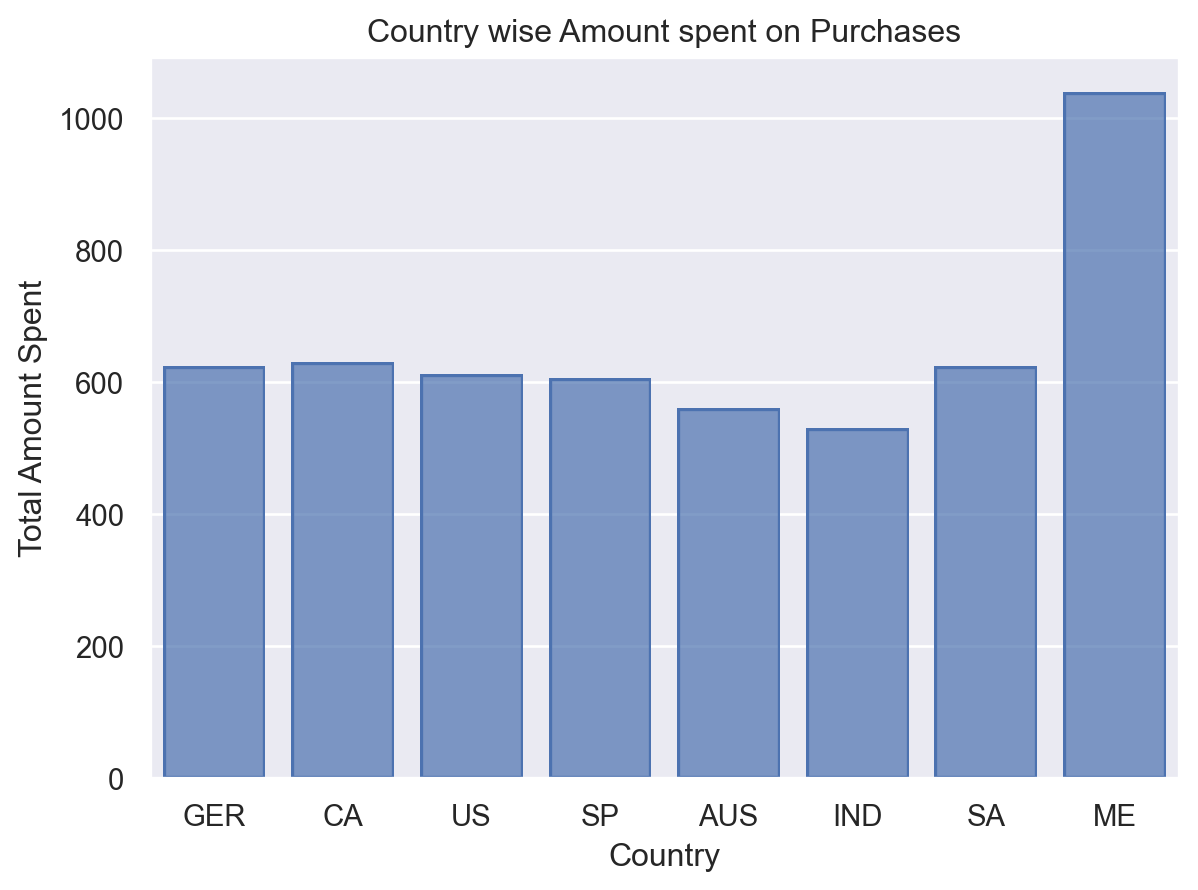

In [38]:
import seaborn.objects as so
p=so.Plot( x=df_new['Country'],y=df_new['Total Amount Spent']).add(so.Bar(),so.Agg())
p.label(title='Country wise Amount spent on Purchases')

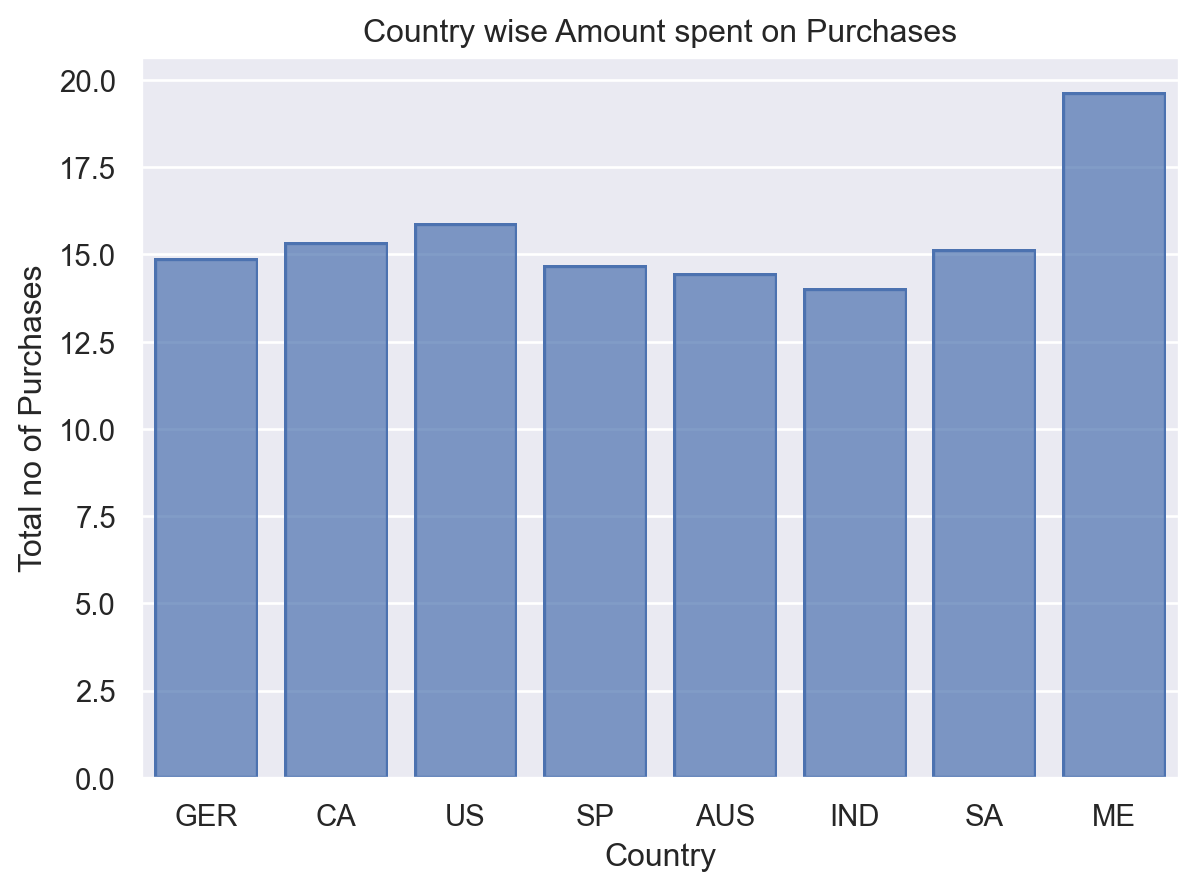

In [39]:
import seaborn.objects as so
p=so.Plot( x=df_new['Country'],y=df_new['Total no of Purchases']).add(so.Bar(),so.Agg())
p.label(title='Country wise Amount spent on Purchases')

# 3.5 Relation between age and  purchases

In [44]:
df_new['Year_Birth'].unique()   #Determing unique values in Yearof Birth column

array([1957, 1961, 1983, 1989, 1971, 1963, 1972, 1986, 1982, 1970, 1955,
       1951, 1973, 1969, 1954, 1964, 1978, 1943, 1959, 1981, 1958, 1967,
       1947, 1979, 1977, 1960, 1966, 1976, 1965, 1956, 1975, 1974, 1990,
       1987, 1984, 1968, 1952, 1962, 1980, 1945, 1949, 1948, 1953, 1946,
       1985, 1992, 1944, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995,
       1899, 1941, 1940, 1900], dtype=object)

In [40]:
df_new['Age']=2023-df_new['Year_Birth']   # Calculation of age of customers

In [41]:
df_new.head(3)

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_children,Total Amount Spent,Age
0,8996,1957,PhD,Married,2,1,2012-11-19,4,230,42,...,0,0,0,0,0,GER,56530.78,3,603,66
1,8268,1961,PhD,Married,0,1,2013-07-11,23,352,0,...,0,0,0,0,0,CA,56530.78,1,404,62
2,1994,1983,Graduation,Married,1,0,2013-11-15,11,5,5,...,0,0,0,0,0,US,50800.26,1,19,40


# Relation between age and people who accepted offer in the last campaign

Text(0.5, 1.0, 'Correlation between Age and Offer accepted in last campaign')

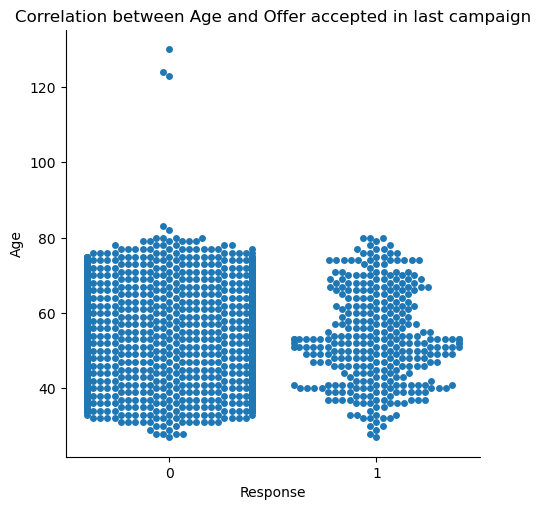

In [42]:
sns.catplot(df_new,x='Response',y='Age',kind='swarm')
plt.title('Correlation between Age and Offer accepted in last campaign')

People mostly in the age group of 40's and 50's accepted offer in the last campaign compared to others

In [43]:
df_new['Age_bin']=pd.cut(df_new['Age'],[0,55,200],labels=['adults','seniors'])
pd.options.display.max_columns=100
df_new.head()                               # grouping of customers according to age as adults and seniors

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_children,Total Amount Spent,Age,Age_bin
0,8996,1957,PhD,Married,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,56530.78,3,603,66,seniors
1,8268,1961,PhD,Married,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,56530.78,1,404,62,seniors
2,1994,1983,Graduation,Married,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,50800.26,1,19,40,adults
3,2437,1989,Graduation,Married,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,0,SP,50800.26,0,1611,34,adults
4,5079,1971,Graduation,Married,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,0,AUS,50800.26,2,97,52,adults


In [56]:
df_new.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'total_children', 'Total Amount Spent', 'Age', 'Age_bin',
       'Education_num', 'NumWebCatPurchases', 'Total no of Purchases'],
      dtype='object')

In [54]:
df_new['NumWebCatPurchases']=df_new['NumWebPurchases']+df_new['NumCatalogPurchases']

# Country which has the greatest number of customers who accepted the last campaign

In [71]:
df_responded=df_new[df_new['Response']==1]
df_responded.shape

(334, 35)

Text(0.5, 1.0, 'Customers responded after last Campaign in various countries')

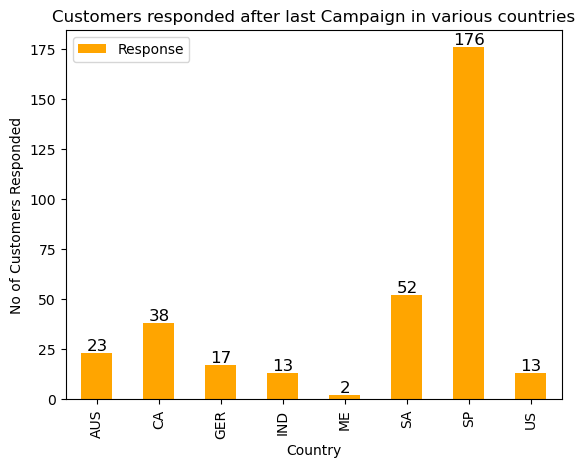

In [72]:
ax=df_responded.pivot_table(index='Country',values='Response',aggfunc='sum').plot(kind='bar',color='orange')#,edgecolor='black')
for container in ax.containers:
    ax.bar_label(container,fontsize=12)
plt.xlabel('Country')
plt.ylabel('No of Customers Responded')
plt.title('Customers responded after last Campaign in various countries')

People in SP followed by SA had more customers responded after last campaign

# Education background of the customers who complained in the last 2 years

In [73]:
df_complain=df_new[df_new['Complain']==1].groupby('Education').count()
df_complain.shape

(4, 34)

Text(0.5, 1.0, 'Customers Complained Vs Education')

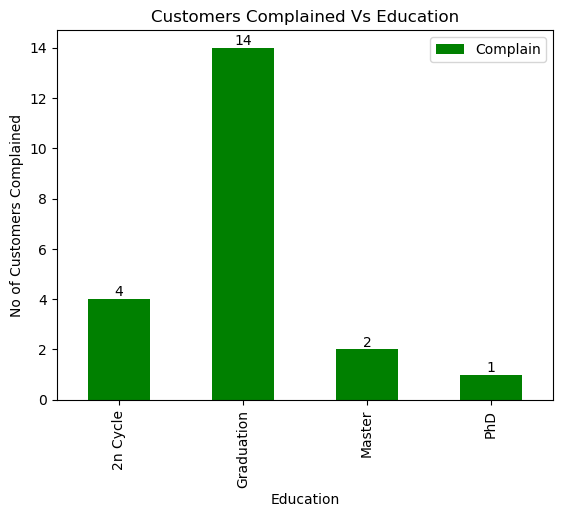

In [74]:
ax=df_complain.pivot_table(index='Education',values='Complain',aggfunc='sum').plot(kind='bar',color='g')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
plt.xlabel('Education')
plt.ylabel('No of Customers Complained')
plt.title('Customers Complained Vs Education')

People who completed graduation has complained the most compared to people with other education background

# 4. Hypothesis Testing

In [57]:
stats.ttest_rel(df_new['Age'],df_new['Total no of Purchases'])   #Statistical ttest between Age and no of  purchases

TtestResult(statistic=142.47519210939285, pvalue=0.0, df=2231)

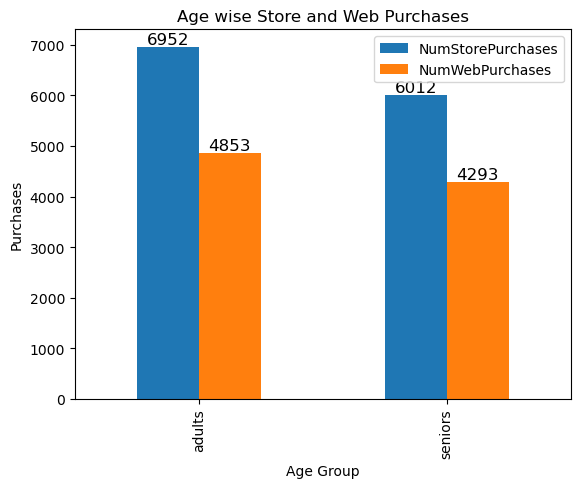

In [58]:
ax=df_new.pivot_table(index='Age_bin',values=['NumStorePurchases','NumWebPurchases'],aggfunc='sum').plot.bar(title='Age wise Store and Web Purchases',xlabel='Age Group',ylabel='Purchases')
for container in ax.containers:
    ax.bar_label(container,fontsize=12)     #Age bin wise STore and Web Purchases

In general, Store purchases were more tham web purchases in both adults and senior age group.... Old people did more of store purchases than web purchases which shows that they are not tech savy

In [60]:
from scipy.stats import stats
stats.ttest_rel(df_new['total_children'],df_new['NumWebCatPurchases'])

TtestResult(statistic=-54.643695938098574, pvalue=0.0, df=2231)

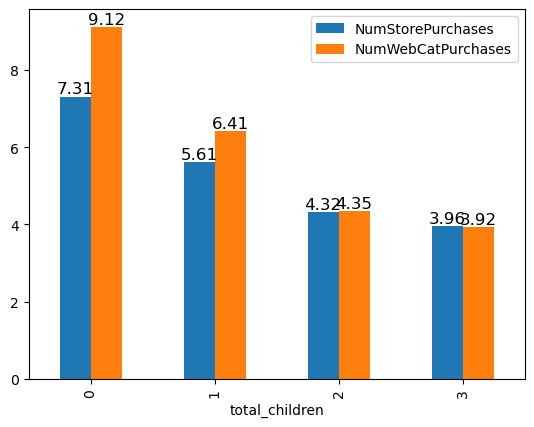

In [63]:
ax=df_new.pivot_table(index='total_children',values=['NumStorePurchases','NumWebCatPurchases'],aggfunc='mean').round(2).plot.bar()
for i in ax.containers:
    ax.bar_label(i,fontsize=12)

People with children preferred web and catalog purchases compared to store purchases

<Axes: ylabel='total_children'>

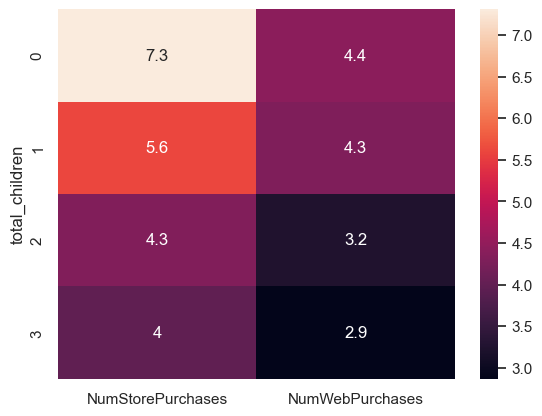

In [138]:
ax=df_new.pivot_table(index='total_children',values=['NumWebPurchases','NumStorePurchases'],aggfunc='mean')
sns.heatmap(ax,annot=True)

In [127]:
df_new.pivot_table(index='Country',values=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebCatPurchases'],aggfunc='sum')

,NumCatalogPurchases,NumStorePurchases,NumWebCatPurchases,NumWebPurchases
Country,,,,
AUS,419,879,1073,654
CA,735,1568,1889,1154
GER,332,721,809,477
IND,343,785,927,584
ME,15,19,33,18
SA,888,1985,2282,1394
SP,2849,6350,7230,4381
US,303,657,787,484


In [93]:
stats.ttest_rel(df_new['NumWebCatPurchases'],df_new['NumStorePurchases'])

TtestResult(statistic=12.011037213894237, pvalue=3.002022710963388e-32, df=2231)

In [98]:
df_new['NumStorePurchases'].astype(float)
df_new['NumWebCatPurchases'].astype(float)

0        9.0
1        7.0
2        1.0
3       11.0
4        3.0
        ... 
2227     7.0
2228     1.0
2229     7.0
2230     9.0
2231    13.0
Name: NumWebCatPurchases, Length: 2232, dtype: float64

<Axes: ylabel='NumWebCatPurchases'>

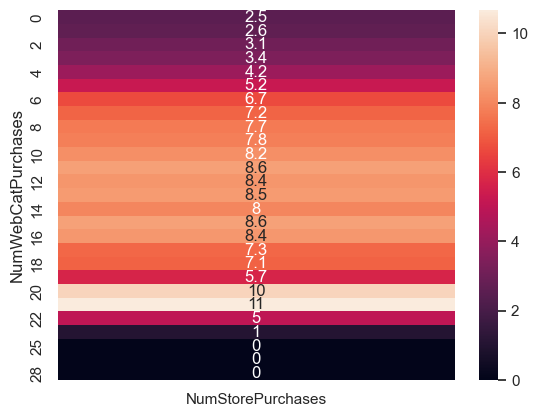

In [124]:
a=df_new.pivot_table(index='NumWebCatPurchases',values='NumStorePurchases')
sns.heatmap(a,annot=True)